<a href="https://colab.research.google.com/github/Ymin-2/ESAA/blob/main/YB2%EC%A1%B0_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ESAA/mini1/movies_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [28]:
df.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [29]:
print(df.isnull().sum()) #결측치 있는 열 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64


In [30]:
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0) #결측치 0으로 채우기
print(df['dir_prev_bfnum'].isnull().sum()) #채우고 결측치 수 다시 확인

0


In [31]:
#이상치 확인
Q1 = df['box_off_num'].quantile(0.25)
Q3 = df['box_off_num'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['box_off_num'] < lower) | (df['box_off_num'] > upper)]
out_num = outliers['box_off_num']

print(f'관객수 이상치 개수: {len(out_num)}')


관객수 이상치 개수: 97


In [32]:
# 관객수 이상치 로그변환
df['box_off_num_log'] = np.log1p(df['box_off_num'])

df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,box_off_num_log
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,10.060449
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,15.771725
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,15.755558
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,12.291640
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,13.088575


In [33]:
df['release_time'] = pd.to_datetime(df['release_time']) #datetime형으로 변환
print(df.info()) #변환 여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            600 non-null    object        
 1   distributor      600 non-null    object        
 2   genre            600 non-null    object        
 3   release_time     600 non-null    datetime64[ns]
 4   time             600 non-null    int64         
 5   screening_rat    600 non-null    object        
 6   director         600 non-null    object        
 7   dir_prev_bfnum   600 non-null    float64       
 8   dir_prev_num     600 non-null    int64         
 9   num_staff        600 non-null    int64         
 10  num_actor        600 non-null    int64         
 11  box_off_num      600 non-null    int64         
 12  box_off_num_log  600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 61.1+ KB
None


#**상영시간과 관객수의 상관관계**
**1. barplot으로 상영시간 구간별 평균 관객수**

In [34]:
# min / max of time
print(df['time'].min())
print(df['time'].max())

45
180


In [35]:
# 상영시간 구간 나눠서 그룹화
bins = [40, 70, 100, 130, 160, 190]
labels = ['40-70분', '70-100분', '100-130분', '130-160분', '160-190분']
# DataFrame에 'time_group' 열 추가
# 연속적인 time 열을 이산적인 구간으로 분류
df['time_group'] = pd.cut(df['time'], bins=bins, labels=labels)

In [36]:
# 상영시간 구간별 평균 관객수
# 분포도 정도를 확인하기 위해 로그변환값으로 이상치의 영향 완화
num_mean = df.groupby('time_group')['box_off_num_log'].mean()
print(num_mean)

time_group
40-70분       7.123091
70-100분      8.099729
100-130분    11.940671
130-160분    13.202418
160-190분    12.654634
Name: box_off_num_log, dtype: float64


/tmp/ipython-input-1493919885.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_mean = df.groupby('time_group')['box_off_num_log'].mean()


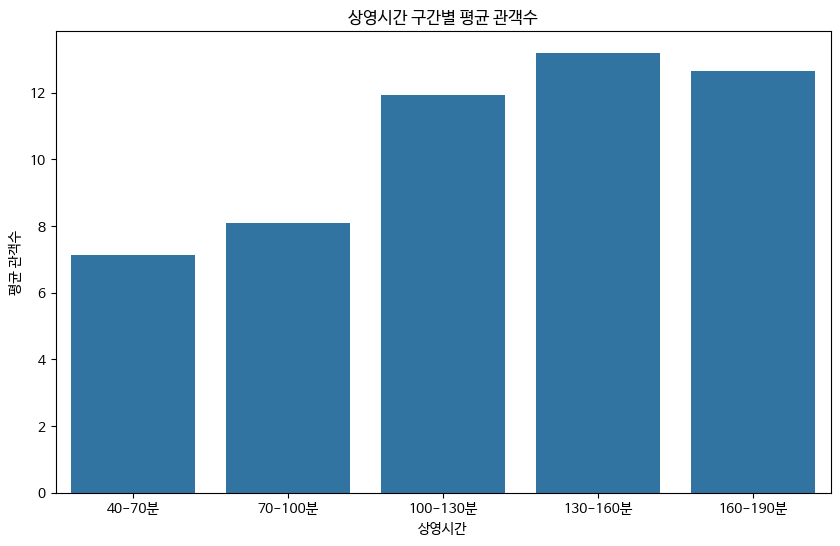

In [37]:
# boxplot으로 시각화
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=num_mean.index, y=num_mean.values)
plt.xlabel('상영시간')
plt.ylabel('평균 관객수')
plt.title('상영시간 구간별 평균 관객수')
plt.show()

**2. 산점도로 상영시간과 관객수의 상관관계 확인**

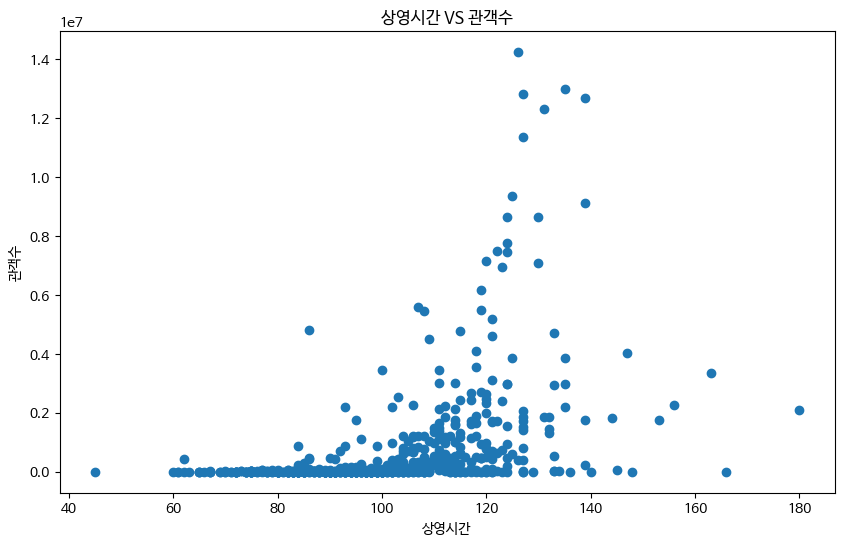

In [38]:
plt.figure(figsize=(10, 6))
# 실제 관객수를 확인하기 위해 실제값을 적용
plt.scatter(df['time'], df['box_off_num'])
plt.xlabel('상영시간')
plt.ylabel('관객수')
plt.title('상영시간 VS 관객수')

plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


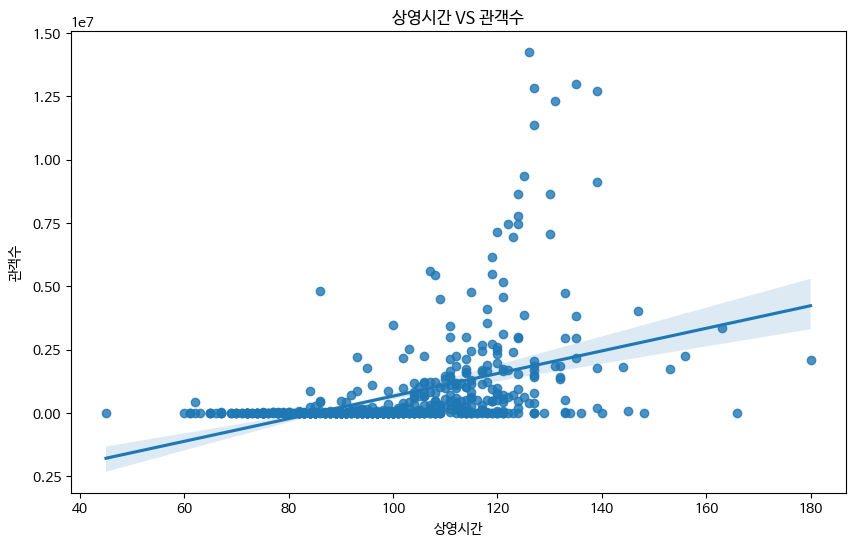

상영시간과 관객수의 상관계수: 0.441


In [39]:
# 상관관계를 명확히 알기 위해 regplot과 상관계수 확인
plt.figure(figsize=(10, 6))
sns.regplot(x='time', y='box_off_num', data=df)
plt.xlabel('상영시간')
plt.ylabel('관객수')
plt.title('상영시간 VS 관객수')

plt.show()

corr = df['time'].corr(df['box_off_num'])
print(f"상영시간과 관객수의 상관계수: {corr:.3f}")

#**상영등급과 관객수의 관계**

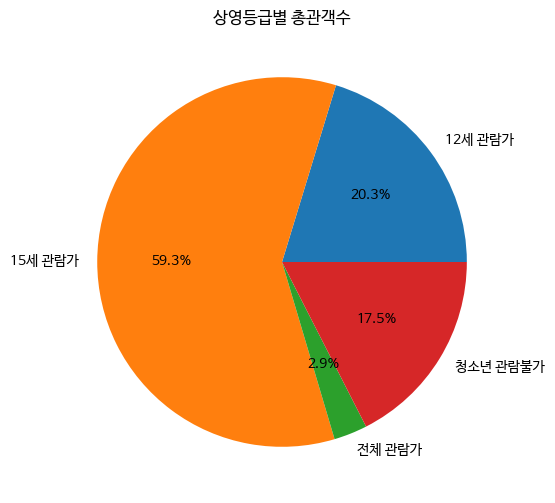

In [40]:
# 원그래프로 시각화
total_bfnum = df.groupby('screening_rat')['box_off_num'].sum()
plt.figure(figsize=(10, 6))
plt.pie(total_bfnum, labels=total_bfnum.index, autopct='%1.1f%%')
plt.title('상영등급별 총관객수')
plt.show()